## Setup

In [1]:
source("/research/lab_reiberger/2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [2]:
p_load("dplyr", "ggplot2", "mice", "janitor", "POMA", "SummarizedExperiment", "EnhancedVolcano", "ggvenn", "PCAtools", "pheatmap", install = FALSE)

In [38]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]

In [39]:
metadata <- metadata %>% filter(sample_id %in% metabol$sample_id)

In [40]:
metabolomics_obj <- PomaSummarizedExperiment(target = metadata, features = metabol[2:ncol(metabol)])

In [41]:
cir_up <- read.csv("outputs/02_cir_up")
cir_down <- read.csv("outputs/02_cir_down")

psvd_up <- read.csv("outputs/02_psvd_up")
psvd_down <- read.csv("outputs/02_psvd_down")

In [6]:
cir_up$feature

[1] "glutamic_acid"            "aspartic_acid"           
 [3] "acetic_acid_c2_0"         "isopentyl_acetate"       
 [5] "isovaleric_acid_3_me_4_0" "taurocholic_acid"        
 [7] "propionic_acid_c3_0"      "pc_o_32_0"               
 [9] "citramalic_acid"          "lpc_o_18_1"              
[11] "palmitoleic_acid_16_1"    "valeric_acid_c5_0"       
[13] "oleic_acid_c18_1"         "lpc_o_16_0"              
[15] "hydroxy_glutamic_acid"    "succinic_acid"           
[17] "stearic_acid_18_0"        "palmitic_acid_16_0"      
[19] "orotic_acid"

## Venn

In [42]:
venn_dataframe <- list("Cirrhosis down" = cir_down$feature,
                       "Cirrhosis up" = cir_up$feature,
                        "PSVD up" = psvd_up$feature,
                        "PSVD down" = psvd_down$feature)

In [46]:
F1_D <- ggvenn(venn_dataframe,
  fill_color = c("#561965", "#561965", "#87d662", "#87d662"),
  stroke_size = 0.5, set_name_size = 8, text_size = 8)

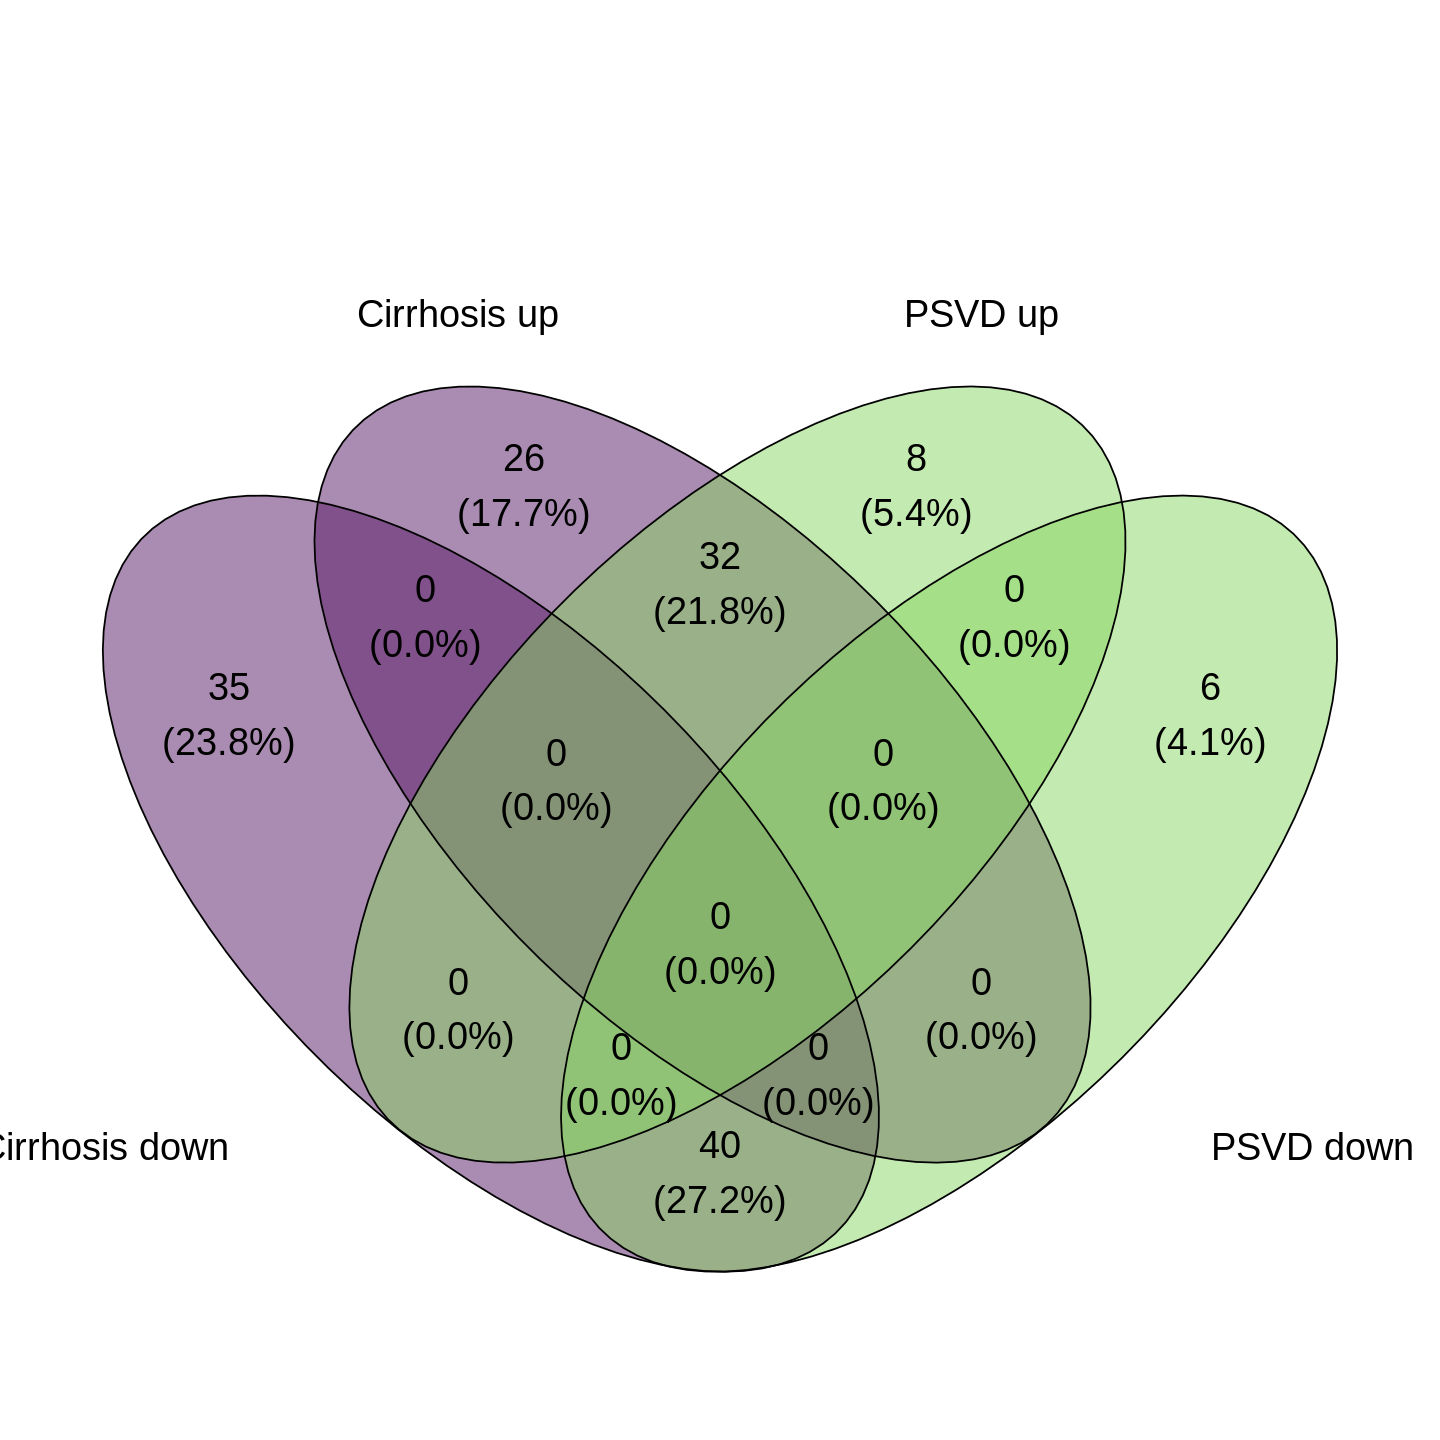

In [47]:
F1_D

In [48]:
cir_up_psvd_down <- intersect(venn_dataframe$`Cirrhosis down`, venn_dataframe$`PSVD up`)

In [49]:
cir_up_psvd_down

character(0)

In [50]:
psvd_up_cir_down <- intersect(venn_dataframe$`PSVD down`, venn_dataframe$`Cirrhosis up`)

In [51]:
psvd_up_cir_down

character(0)

In [52]:
cirr_up_unique <- setdiff(venn_dataframe$`Cirrhosis up`, c(venn_dataframe$`PSVD up`, venn_dataframe$`PSVD down`))
psvd_up_unique <- setdiff(venn_dataframe$`PSVD up`, c(venn_dataframe$`Cirrhosis up`, venn_dataframe$`Cirrhosis down`))

cirr_down_unique <- setdiff(venn_dataframe$`Cirrhosis down`, c(venn_dataframe$`PSVD up`, venn_dataframe$`PSVD down`))
psvd_down_unique <- setdiff(venn_dataframe$`PSVD down`, c(venn_dataframe$`Cirrhosis up`, venn_dataframe$`Cirrhosis down`))

In [53]:
cirr_up_unique
psvd_up_unique

cirr_down_unique
psvd_down_unique

[1] "taurocholic_acid"           "pc_32_1"                   
 [3] "lac_cer_d42_2"              "tag_48_0"                  
 [5] "tag_50_0"                   "tag_50_1"                  
 [7] "succinic_acid"              "tag_50_2"                  
 [9] "lpc_16_1"                   "pc_34_1"                   
[11] "pc_o_32_1"                  "myristoylcarnitine"        
[13] "tag_48_1"                   "palmitoleic_acid_16_1"     
[15] "dag_34_1"                   "palmitoylcarnitine"        
[17] "tag_46_0"                   "tag_52_2"                  
[19] "tag_48_2"                   "pc_36_1"                   
[21] "erythro_dihydrosphingosine" "tag_52_1"                  
[23] "tag_46_1"                   "cer_d42_0"                 
[25] "glc_cer_d42_2"              "tag_54_2"

[1] "adipic_acid"           "argininosuccinic_acid" "oxamic_acid"          
[4] "thymine"               "xanthosine"            "cholic_acid"          
[7] "pi_36_2"               "pentose"

[1] "pe_40_4"                   "pc_35_2"                  
 [3] "sm_d40_2"                  "cer_d42_1"                
 [5] "pyridinedicarboxylic_acid" "pe_o_38_6"                
 [7] "cer_d41_1"                 "lpc_18_2"                 
 [9] "phenylpyruvic_acid"        "pe_38_2"                  
[11] "sm_d34_2"                  "pe_40_6"                  
[13] "pc_o_38_6"                 "sm_d40_1"                 
[15] "sm_d36_2"                  "pi_38_4"                  
[17] "sm_d38_1"                  "lpc_22_6"                 
[19] "capric_acid_c10_0"         "sm_d33_1"                 
[21] "dimethyl_succinic_acid"    "lpc_20_4"                 
[23] "pe_o_38_5"                 "pc_o_36_5"                
[25] "pc_38_4"                   "sm_d38_2"                 
[27] "sm_d35_1"                  "pe_42_4"                  
[29] "kynurenine"                "sm_d32_1"                 
[31] "pe_o_36_5"                 "pc_o_40_7"                
[33] "pc_34_2"                   "creatinine"               
[35] "lpc_20_3"

[1] "tag_50_4"      "phenylalanine" "pc_40_5"       "isoleucine"   
[5] "tag_56_4"      "tyrosine"

## DimReduction

In [17]:
metadata <- metadata %>% tibble::column_to_rownames("sample_id")

In [18]:
pca_calculated <- pca(assay(metabolomics_obj), metadata = metadata, removeVar = 0.4)

-- removing the lower 40% of variables based on variance



Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


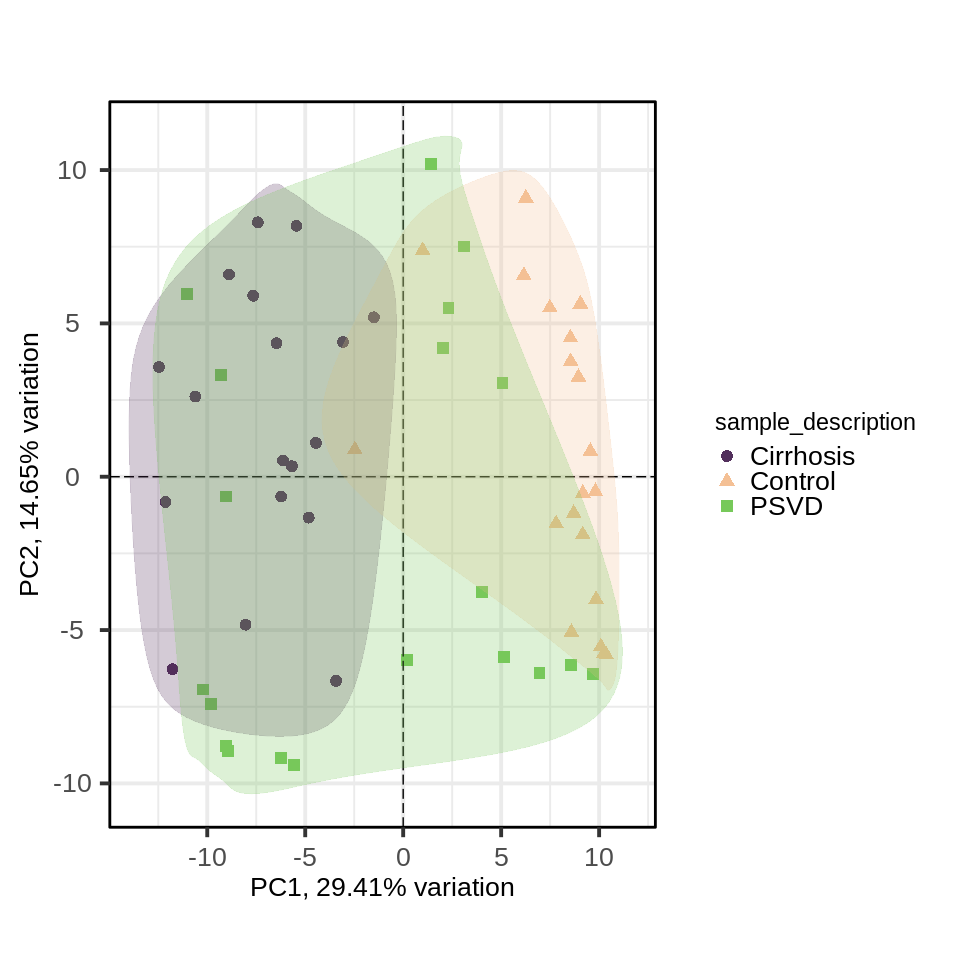

In [30]:
options(repr.plot.width = 8, repr.plot.height = 8)
biplot(pca_calculated, lab = NULL, colby = "sample_description", colkey = c(Cirrhosis = "#522f5c",
  PSVD = "#77c95a", Control = "#F4C095"), 
        encircle = TRUE, encircleFill = TRUE,
        showLoadings = FALSE, ntopLoadings = 7, sizeLoadingsNames = 2, alphaLoadingsArrow = 0.3, colLoadingsNames = 'red4', hline = 0, vline = 0, 
        legendPosition = "right", legendLabSize = 16, legendIconSize = 3, shape = "sample_description", shapekey = c(`Cirrhosis` = 16, `PSVD` = 15, Control = 17))

-- variables retained:

pyruvic_acid, glutamic_acid, aspartic_acid, tag_46_1, tag_50_1, tag_48_1, tag_50_0, tag_48_2, tag_50_2, tag_52_1, tag_50_3, tag_48_3, lpc_o_18_1, lpc_o_16_0, lpc_o_16_1, lpc_18_2, lpc_16_0, lpc_18_1, lpc_18_0, lpc_17_0, pc_o_34_3



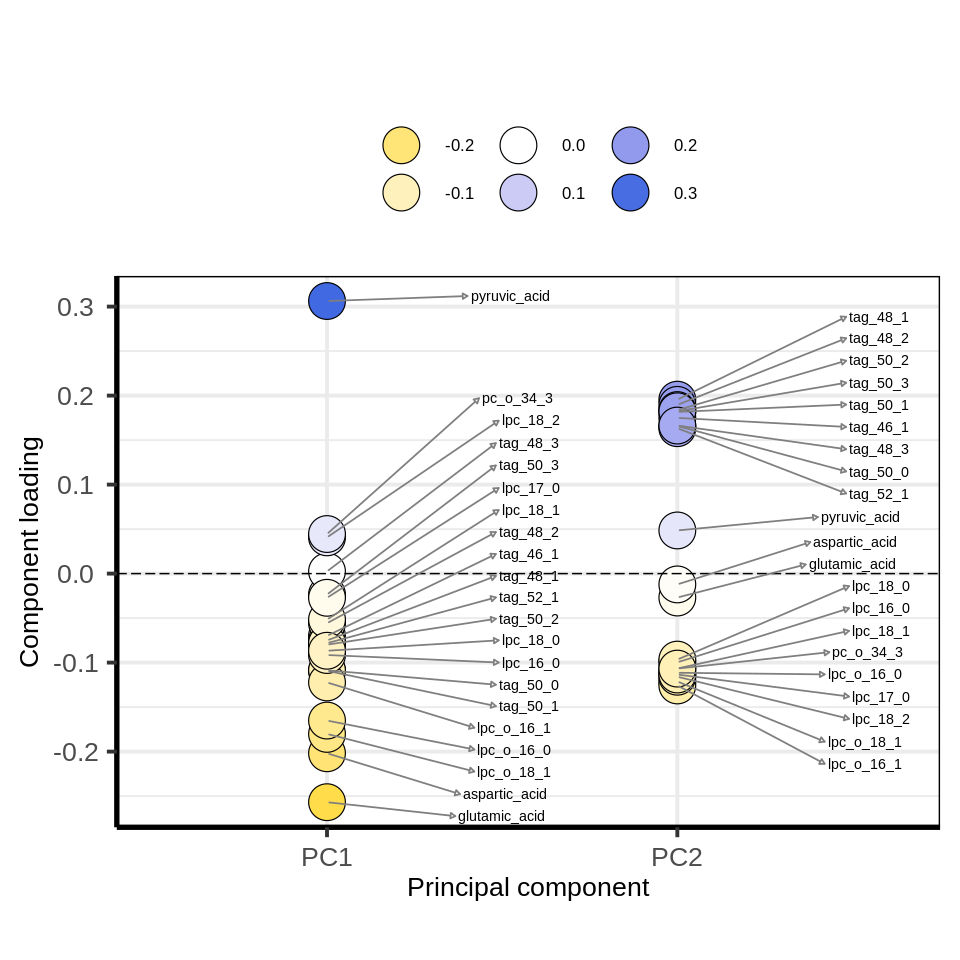

In [35]:
 plotloadings(pca_calculated, components = getComponents(pca_calculated, c(1, 2)), 
                rangeRetain = 0.1, labSize = 3)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

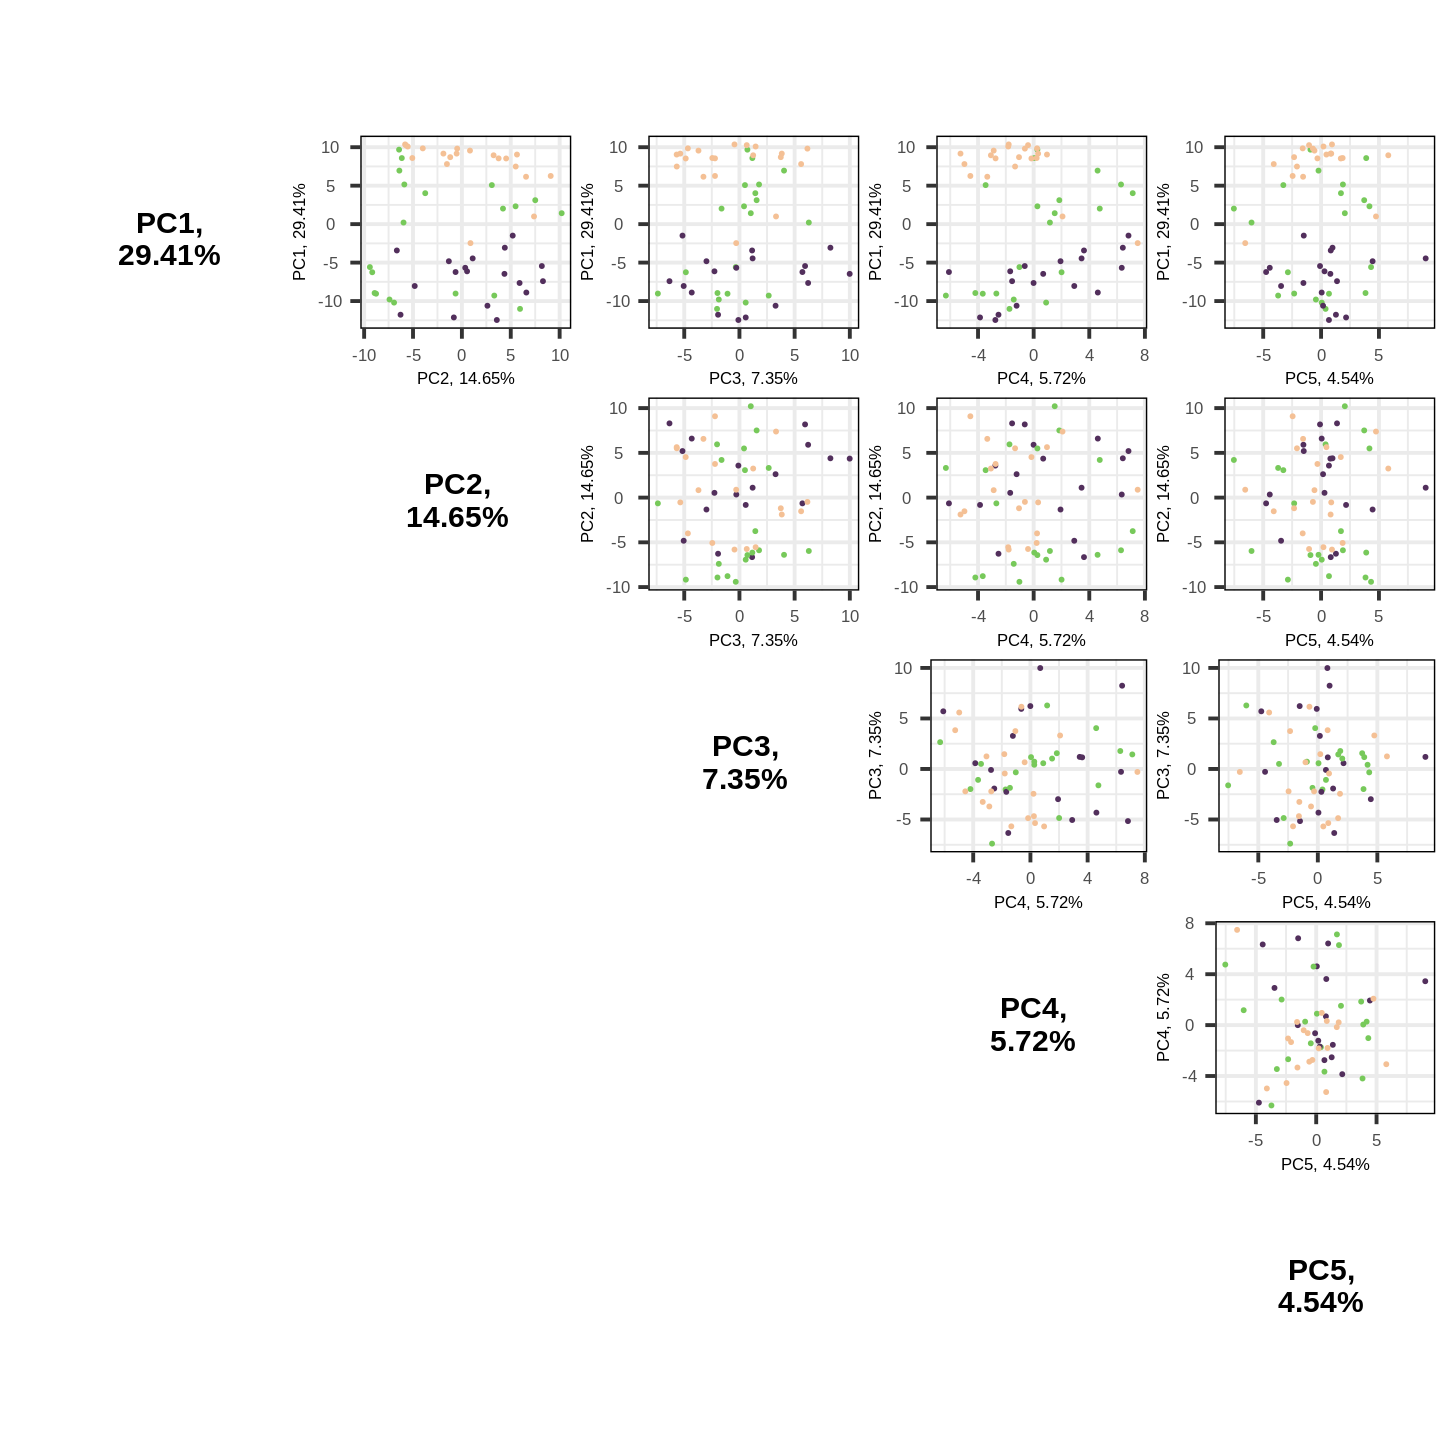

In [37]:
options(repr.plot.width = 12, repr.plot.height = 12)
 pairsplot(pca_calculated, colby = 'sample_description', 
            colkey = c(Cirrhosis = "#522f5c",
  PSVD = "#77c95a", Control = "#F4C095")) 

## Heatmap

In [54]:
metab_of_interest <- c(cirr_up_unique, psvd_up_unique, cirr_down_unique, psvd_down_unique)

In [64]:
cir_cneg <- read.csv("outputs/02_cir_cneg")
psvd_cir <- read.csv("outputs/02_psvd_cir")
psvd_cneg <- read.csv("outputs/02_psvd_cneg")

In [75]:
psvd_cir <- psvd_cir %>% filter(adj.P.Val < 0.05 & logFC > 0.5 | adj.P.Val < 0.05 & logFC < -0.5)
psvd_cneg <- psvd_cneg %>% filter(adj.P.Val < 0.05 & logFC > 0.5 | adj.P.Val < 0.05 & logFC < -0.5)

In [79]:
metab_of_interest <- c(psvd_cir$feature)

In [109]:
mat <- metabol %>% tibble::column_to_rownames("sample_id") %>% t()
mat <- mat %>% as.matrix()
mat <- mat[metab_of_interest,]

In [110]:
ann <- colData(metabolomics_obj)
#ann$sample_description <- as.factor(ann$sample_description)
#ann$sample_description <- relevel(ann$sample_description, "Control")
#ann$sample_description <- relevel(ann$sample_description, "Cirrhosis")
#ann$sample_description <- relevel(ann$sample_description, "PSVD")
ann <- as.data.frame(ann) %>% arrange(group_123)

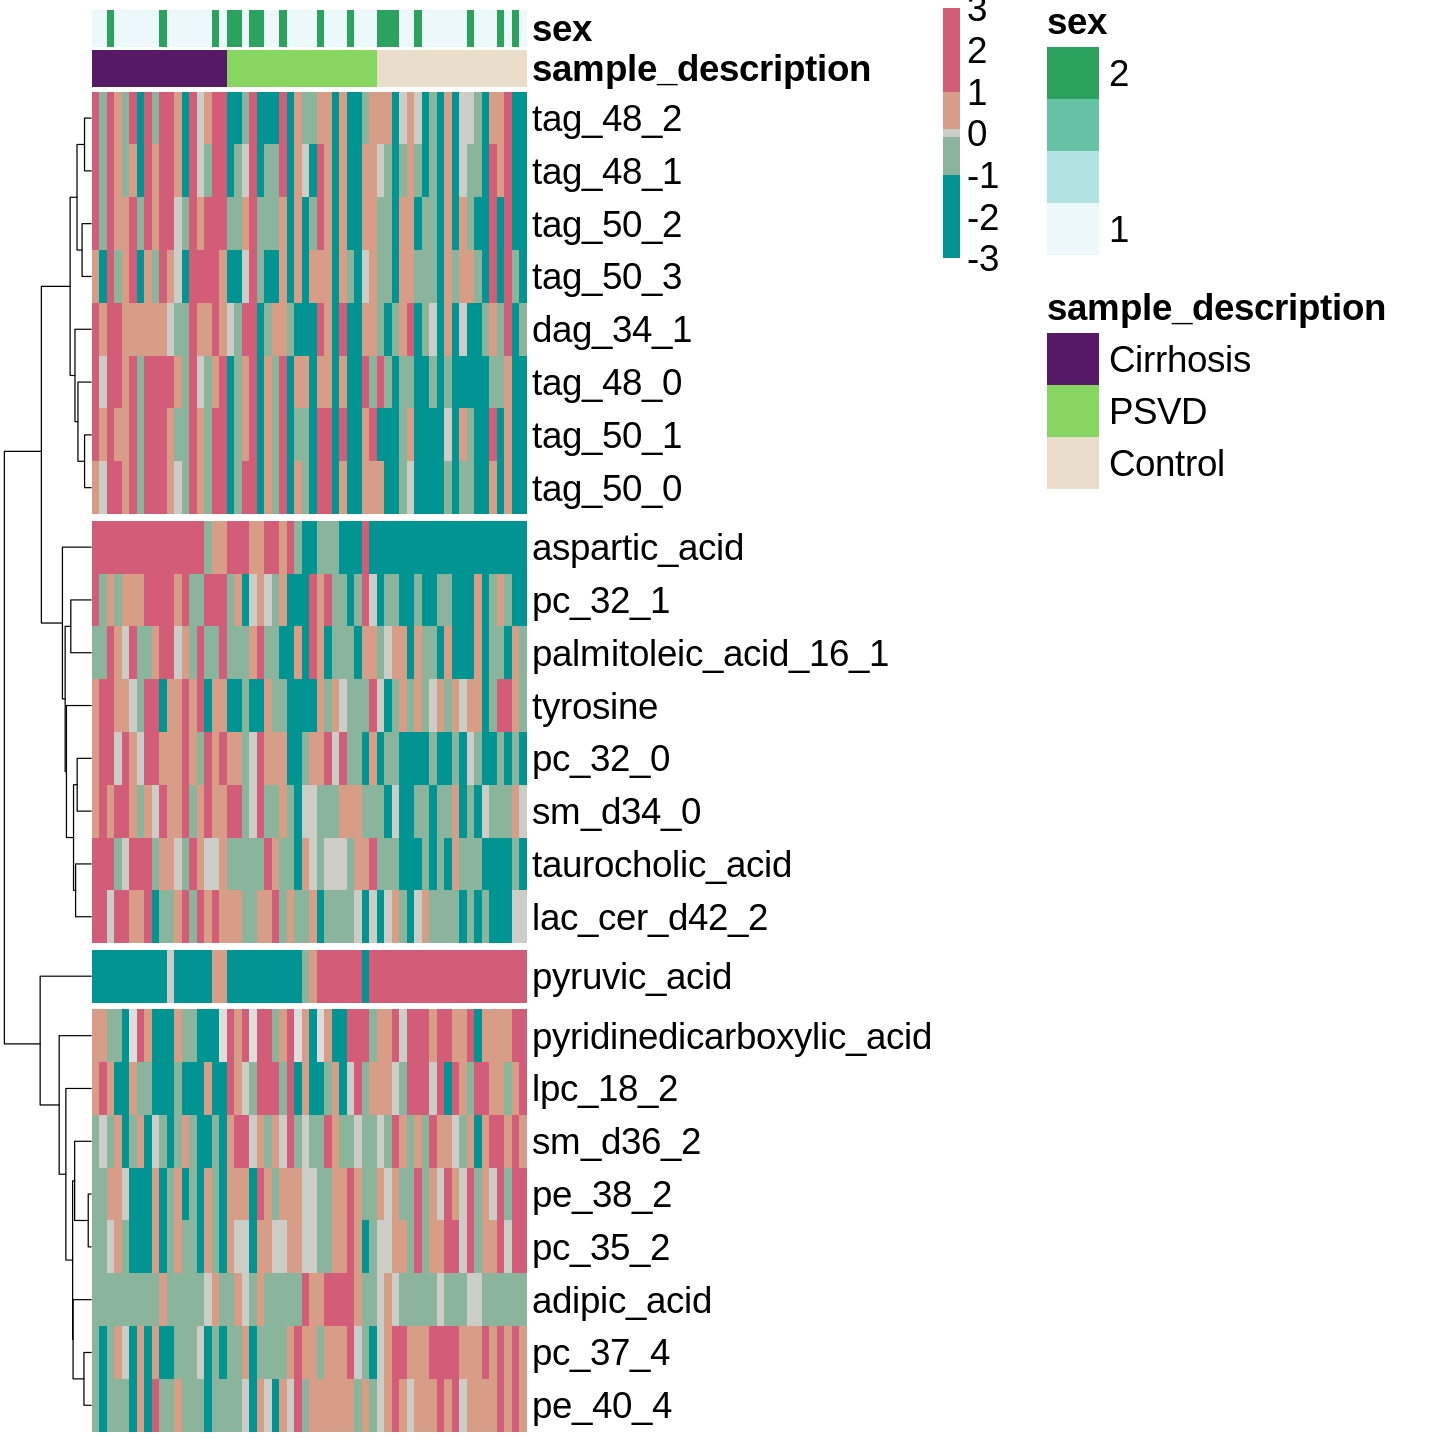

In [124]:
options(repr.plot.width = 12, repr.plot.height = 12)

annotation <- as.data.frame(ann[, c("sample_description", "sex")])


ann_colors <- list(sample_description = c('Cirrhosis' = "#561965", 'PSVD' = "#87d662", 'Control' = "#EADDCA"))

mat <- mat[, (row.names(ann))]

F1_A <- pheatmap(mat,  color = c("#009593", "#8AB49B", "#CCCDC6", "#D79D86", "#D35C79"), breaks = c(-3, -1, -0.1, 0.1, 1, 3), cluster_rows = TRUE,
  show_rownames = TRUE, cluster_cols = F,
  show_colnames = FALSE, annotation_col = annotation, annotation_colors = ann_colors, clustering_method = "ward.D2",
  cutree_rows = 4, fontsize = 22)